# Project: Automobile data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

This data set contains information about 22 car types collected from a database of a car factory, including everything related to these cars.

Want to find answer to this questions:

1- What are the most expensive types of cars?
<br>
2- Are cars that have a type of fuel (diesel) different from other cars?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn') #ggplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

 <a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
car = pd.read_csv('Automobile_data.csv')

In [3]:
df = car.copy()

In [4]:
df
# df.shape

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


### Chcking if there is null values or not

In [5]:
df.isnull().any()
# Or df.info()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

### Not found (null) values But found wrnog data have (?) valuse -> So replace (?) values with (null) values

In [6]:
df = pd.read_csv('Automobile_data.csv', na_values='?')

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Chcking Again if there is null values or not

In [8]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### I found rows that have null values so I will fill it by Median
#### Use median rather than mean, because I have outliers in columns (mean affected with outliers, but median not)

In [10]:
med_cols = df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm','price']].median()
med_cols

normalized-losses      115.00
bore                     3.31
stroke                   3.29
horsepower              95.00
peak-rpm              5200.00
price                10295.00
dtype: float64

In [11]:
df = df.fillna(med_cols)

### I check agin to see the edit

In [12]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### I have Null values in (num-of-doors column) so I fill it by Mode -->beacause it is categorical values

In [13]:
df["num-of-doors"].mode()
# or df["num-of-doors"].value_counts()

0    four
dtype: object

In [14]:
df["num-of-doors"] = df["num-of-doors"].fillna("four")

### I check agin to see the edit

In [15]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


In [16]:
def my_plot(col_name):    
    plt.figure(figsize=(8,6))
    plt.hist(df[col_name])
    plt.title(f"{col_name} Distribution", fontsize=16)
    plt.xlabel(col_name)
    plt.ylabel("Car Count")
    plt.show()

### Distribution for Numerical Data

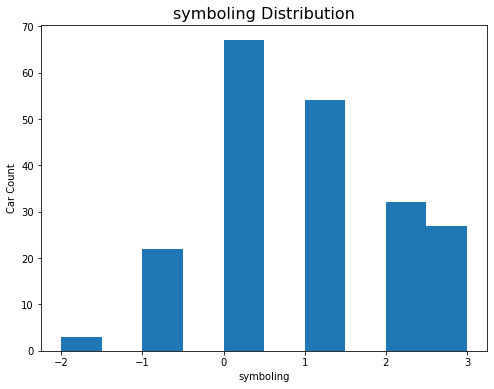

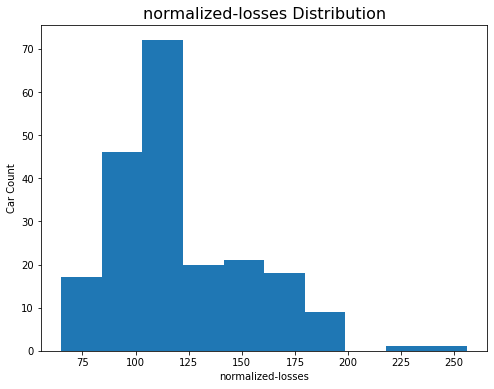

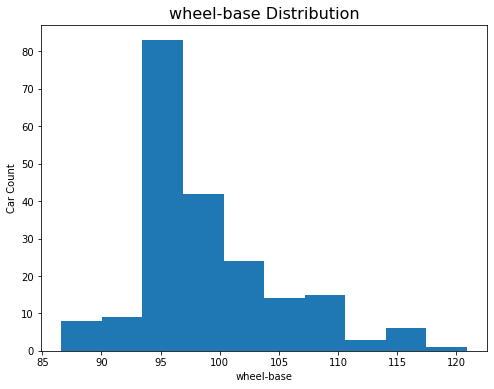

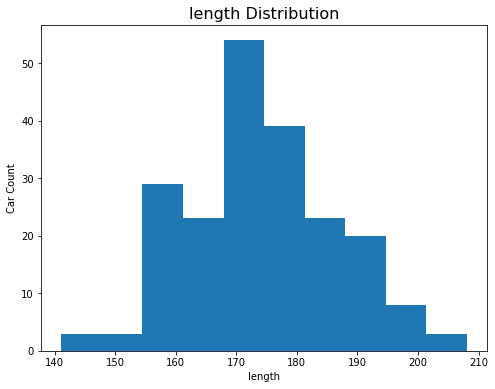

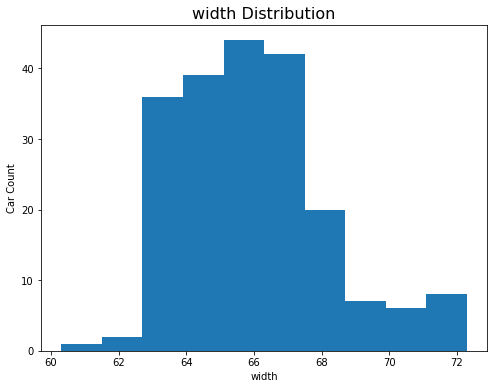

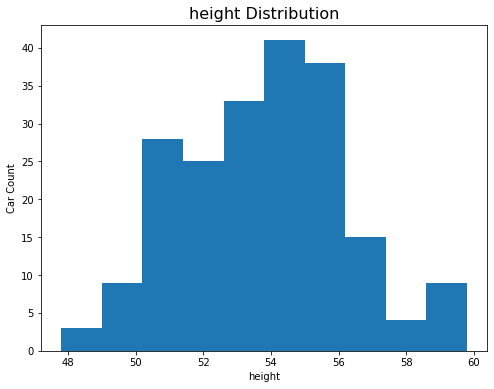

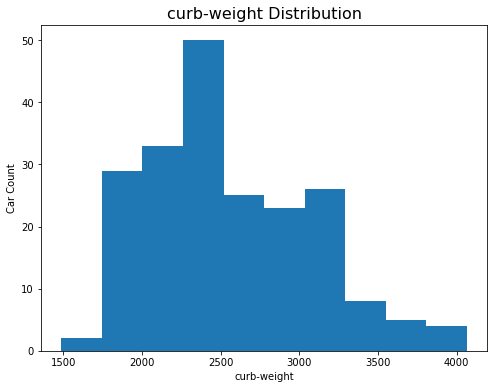

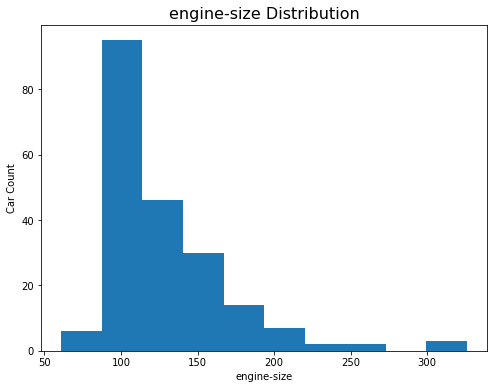

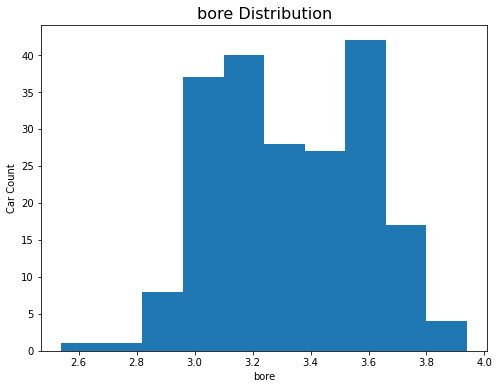

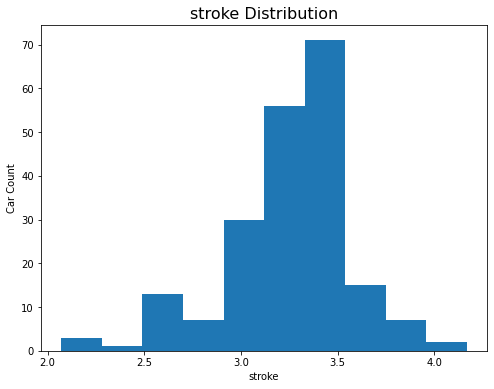

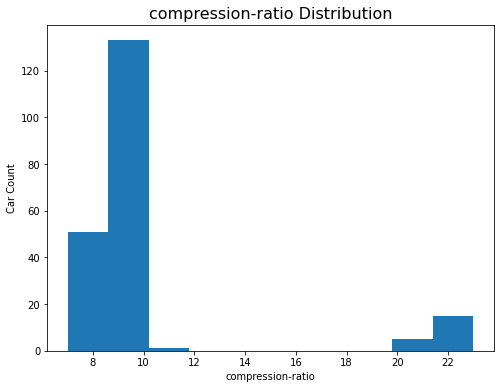

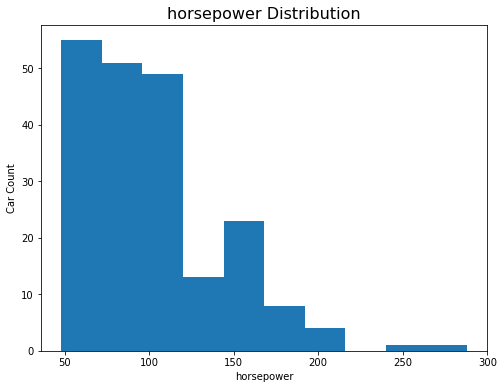

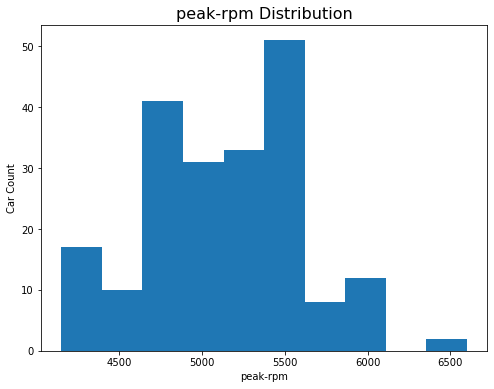

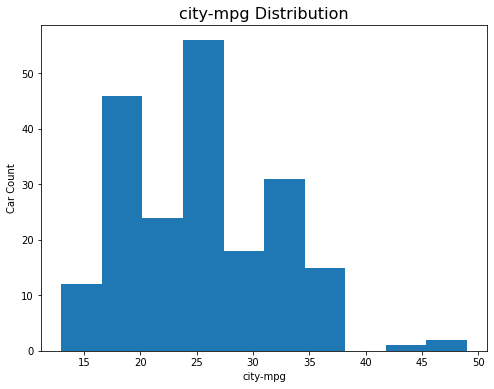

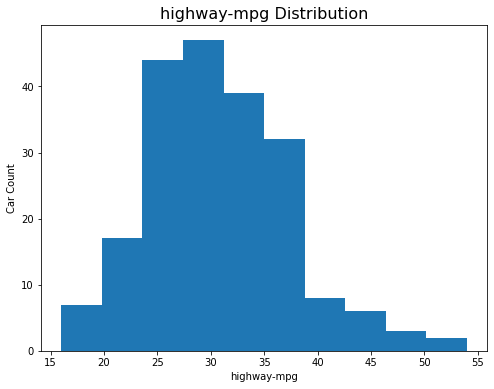

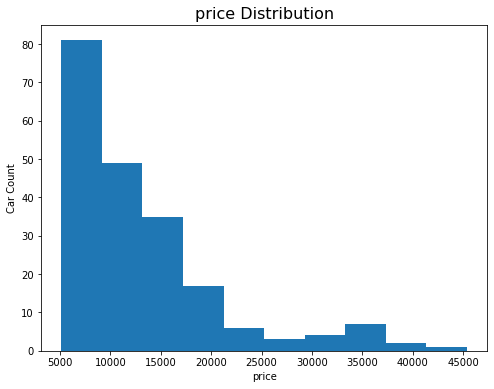

In [17]:
num_cols = df.columns[df.dtypes != "object"] # Numerical Data

for col in num_cols:
    my_plot(col)

### From (normalized-losses Distribution) I found that (normalized-losses column) has Outliers
#### So I will handle this Outliers By use Mode

In [18]:
df[df["normalized-losses"] > 200]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
106,1,231.0,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0
190,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,9980.0


In [19]:
# df[df["make"] == "nissan"].sort_values("normalized-losses")
df[df["make"] == "volkswagen"].sort_values("normalized-losses")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
184,2,94.0,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52.0,4800.0,37,46,7995.0
185,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85.0,5250.0,27,34,8195.0
186,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85.0,5250.0,27,34,8495.0
187,2,94.0,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,68.0,4500.0,37,42,9495.0
188,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,10.0,100.0,5500.0,26,32,9995.0
189,3,115.0,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90.0,5500.0,24,29,11595.0
191,0,115.0,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,24,13295.0
192,0,115.0,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68.0,4500.0,33,38,13845.0
193,0,115.0,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88.0,5500.0,25,31,12290.0
182,2,122.0,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52.0,4800.0,37,46,7775.0


In [20]:
df[df["make"] == "volkswagen"]["normalized-losses"].mode()

0    94.0
dtype: float64

In [21]:
df["normalized-losses"] = df["normalized-losses"].replace(256, 115)   # It is better to use 115(median) than 94(mode)

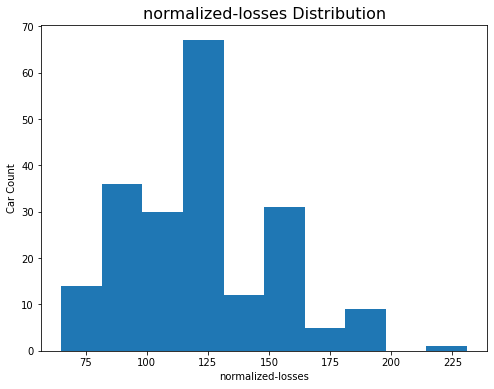

In [22]:
my_plot("normalized-losses")

### From (engine-size Distribution) I found that (engine-size column) has Outliers
#### So I will handle this Outliers By use IQR

In [23]:
df[df["engine-size"] > 200].sort_values("engine-size")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
129,1,115.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,10295.0
15,0,115.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,115.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,115.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
71,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
48,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
74,1,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
73,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0


In [24]:
df.loc[df['make'].isin(['mercedes-benz', 'jaguar'])].sort_values("engine-size")
# df.loc[~df['make'].isin(['mercedes-benz', 'jaguar'])].sort_values("engine-size") ---> this mena NOT ['mercedes-benz', 'jaguar']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
71,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
48,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0
74,1,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
73,0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0


#### when use IQR method, I discovered that a large number of data will be dropped, So I will keep these outliers as these are in the data
#### Because these outliers do not affect the data, and these normal values

In [25]:
df["engine-size"].describe()
# Or df["engine-size"].quantile([0, 0.25, 0.5, 0.75, 1])

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

In [26]:
iqr = df["engine-size"].quantile(0.75) - df["engine-size"].quantile(0.25)
limit = iqr * 1.5 + df["engine-size"].quantile(0.75)
limit
# df[df["engine-size"] > limit].sort_values("engine-size")

207.0

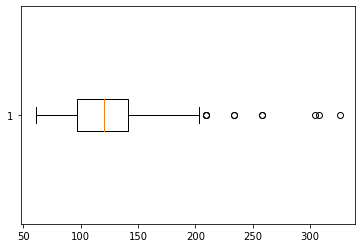

In [27]:
plt.figure()
plt.boxplot(df["engine-size"], vert=False, showfliers=True)
plt.show()

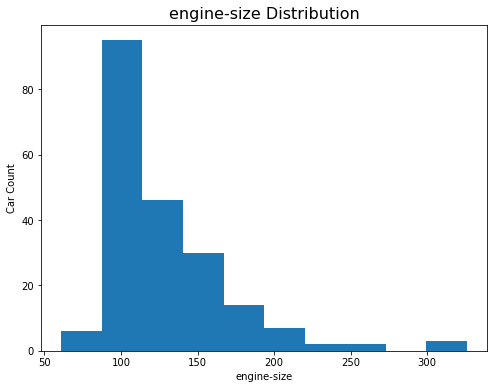

In [28]:
my_plot("engine-size")

### From (compression-ratio Distribution) I found that (compression-ratio column) has Outliers
#### So I will handle this Outliers By drop these outliers

In [29]:
df[df['compression-ratio'] > 10]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
32,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
49,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
63,0,115.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,0,115.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0


In [30]:
# df[df['fuel-type'] == "diesel"].sort_values('compression-ratio')
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [31]:
# df[df['fuel-system'] == "idi"].sort_values('compression-ratio')
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

#### when drop these outliers, I discovered that a large number of data will be dropped (20 rows)
### NOTE these outliers in column (compression-ratio) :-
### have same (fuel-type) => "diesel" and same (fuel-system) => "idi"
#### So I will keep these outliers as these are in the data

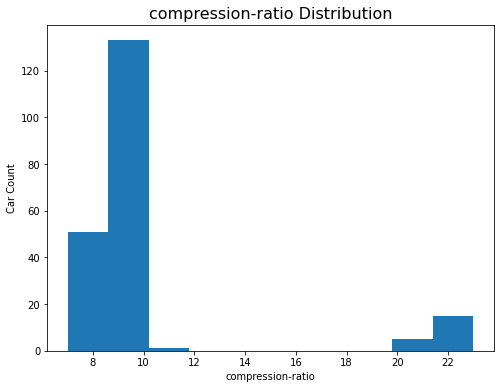

In [32]:
my_plot('compression-ratio')

### From (price Distribution) I found that (price column) has Right-Skewed
#### So I will handle this Skewed distribution By use Log Function (this method is type of Scaling Data)

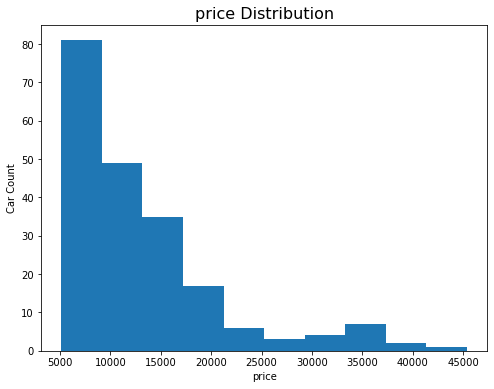

In [33]:
my_plot("price")

In [34]:
df["price_log"] = np.log(df["price"])   # Use this function because I will use Machine Learning Algorithms

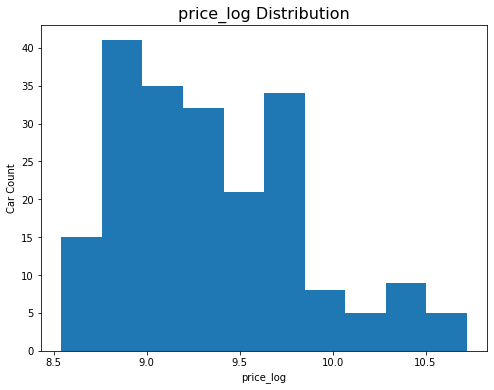

In [35]:
my_plot("price_log")

### Distribution for Categorical Data

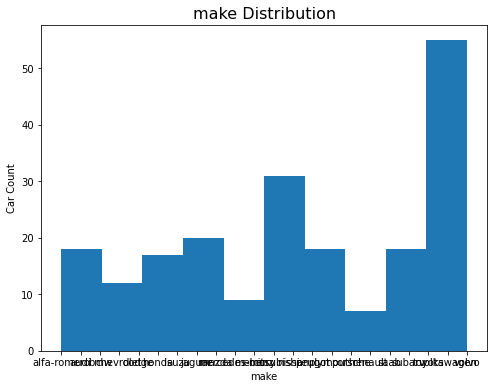

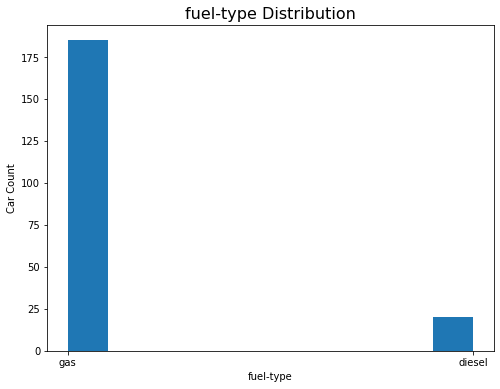

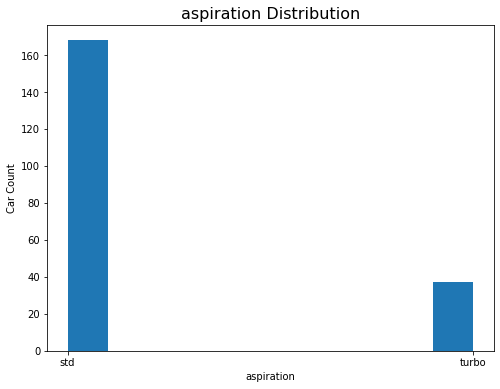

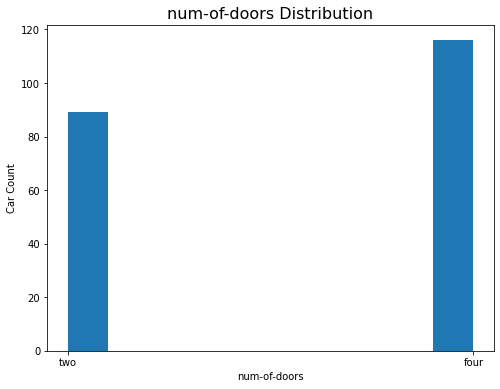

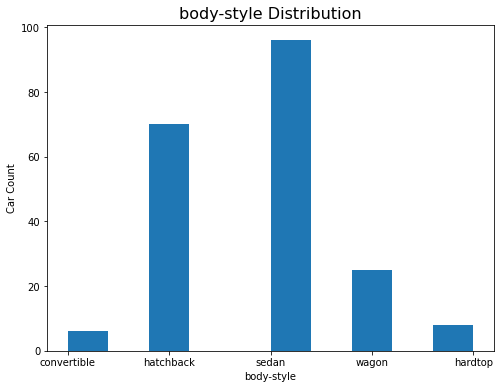

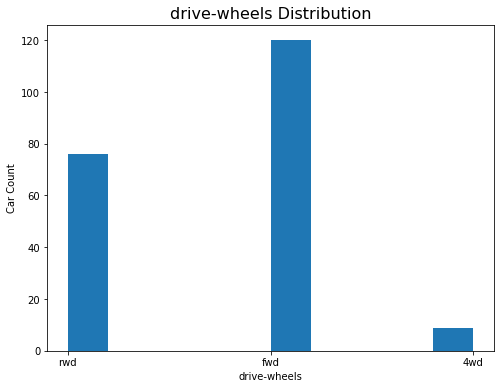

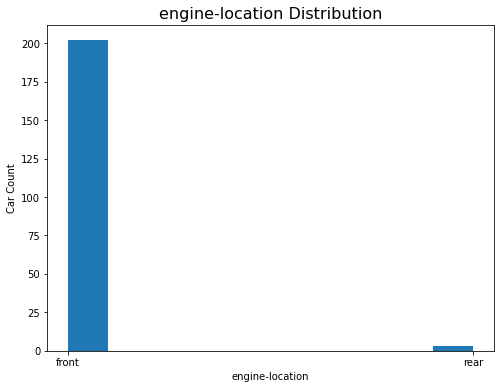

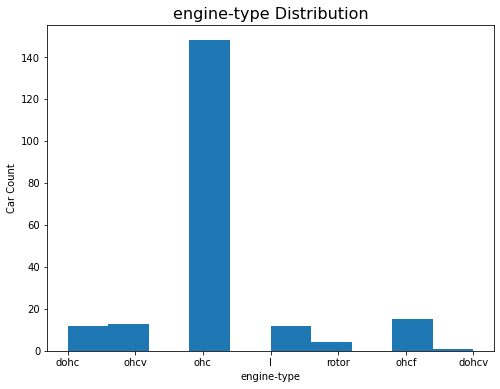

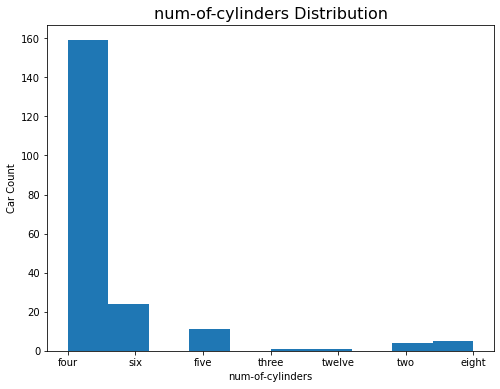

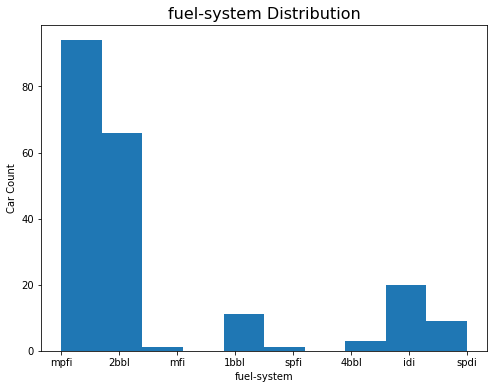

In [36]:
cat_cols = df.columns[df.dtypes == "object"] # Catogrical Data

for col in cat_cols:
    my_plot(col)

In [37]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_log
symboling,1.000000,0.439749,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.132563,-0.004928,-0.178515,0.071064,0.273851,-0.035823,0.034606,-0.080149,-0.088422
normalized-losses,0.439749,1.000000,-0.061137,0.008246,0.081419,-0.361489,0.082049,0.085795,-0.041123,0.038525,-0.110842,0.183105,0.234813,-0.194346,-0.150706,0.109215,0.155979
wheel-base,-0.531954,-0.061137,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.489556,0.159684,0.249786,0.352876,-0.361338,-0.470414,-0.544082,0.584847,0.635305
length,-0.357612,0.008246,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607016,0.128622,0.158414,0.553337,-0.286362,-0.670909,-0.704662,0.686567,0.770070
width,-0.232919,0.081419,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559262,0.182708,0.181129,0.641337,-0.219374,-0.642704,-0.677218,0.724558,0.771824
height,-0.541038,-0.361489,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.173506,-0.058994,0.261214,-0.109286,-0.321113,-0.048640,-0.107358,0.140439,0.181180
curb-weight,-0.227691,0.082049,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648848,0.168164,0.151362,0.750927,-0.266358,-0.757414,-0.797465,0.819817,0.876561
engine-size,-0.105790,0.085795,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.585636,0.200246,0.028971,0.810216,-0.244383,-0.653658,-0.677470,0.860343,0.819341
bore,-0.132563,-0.041123,0.489556,0.607016,0.559262,0.173506,0.648848,0.585636,1.000000,-0.056054,0.005468,0.574258,-0.256600,-0.582627,-0.585352,0.532861,0.593996
stroke,-0.004928,0.038525,0.159684,0.128622,0.182708,-0.058994,0.168164,0.200246,-0.056054,1.000000,0.185679,0.083804,-0.059716,-0.044973,-0.046389,0.083627,0.101007


Text(0.5, 1.0, 'CORRELATION MATRIX')

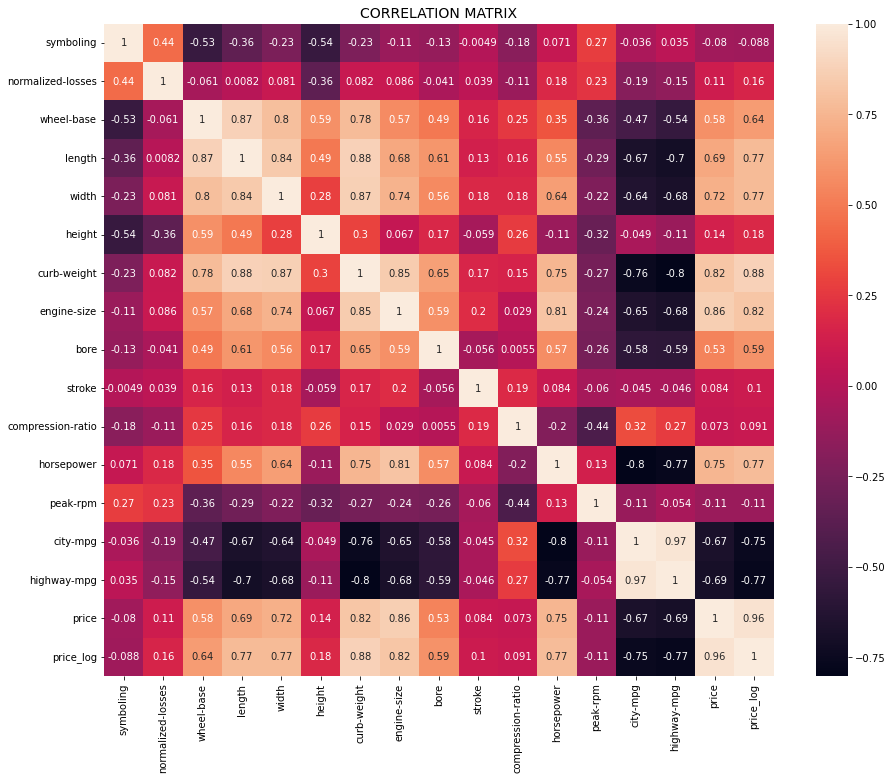

In [38]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(df.corr(), annot=True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

### From Correlation and Scatter plot between (price_log and engine-size)
#### Conclude these columns have high positive corr between together

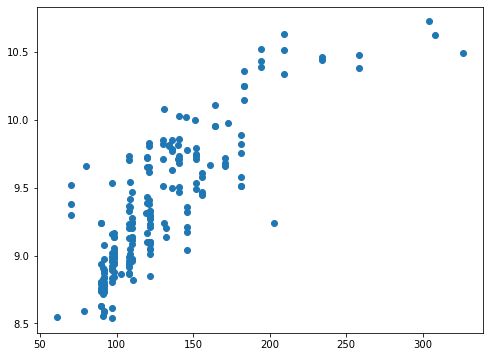

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(df['engine-size'], df['price_log'])
plt.show()

### From Correlation and Scatter plot between (price_log and curb-weight)
#### Conclude these columns have high positive corr between together

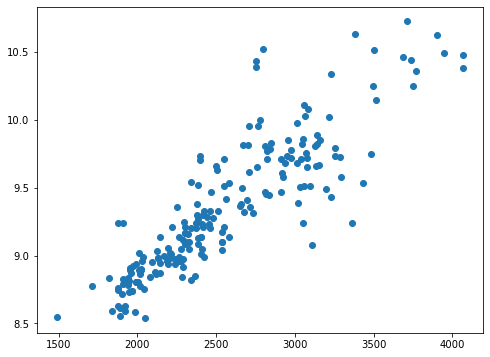

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(df['curb-weight'], df['price_log'])
plt.show()

### From Correlation and Scatter plot between (price_log and highway-mpg)
#### Conclude these columns have high negative corr between together

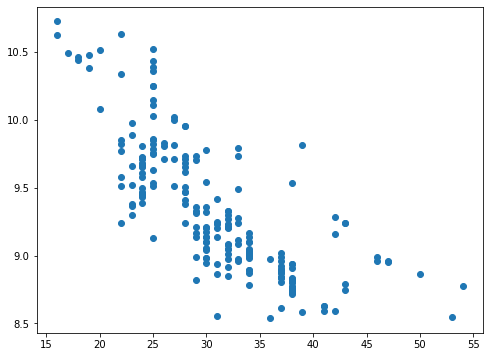

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(df['highway-mpg'], df['price_log'])
plt.show()

### From Correlation and Scatter plot between (price_log and width)
#### Conclude these columns have high  positive corr between together

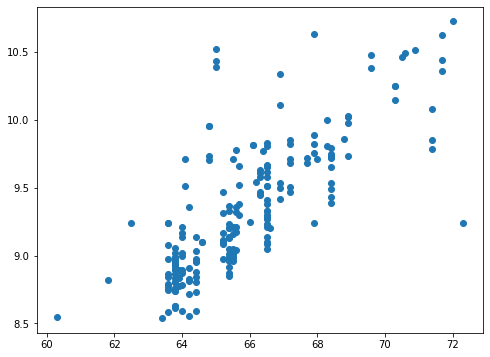

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(df['width'], df['price_log'])
plt.show()

### From Correlation and Scatter plot between (price_log and horsepower)
#### Conclude these columns have high  positive corr between together

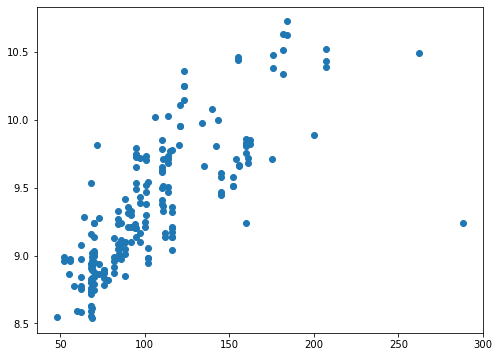

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(df['horsepower'], df['price_log'])
plt.show()

### From Correlation and Scatter plot between (price_log and symboling)
#### Conclude these columns NOT have corr between together

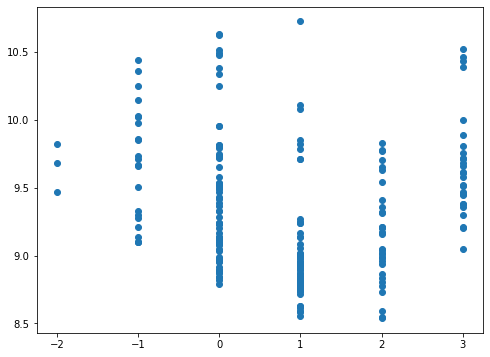

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(df['symboling'], df['price_log'])
plt.show()

<Figure size 432x288 with 0 Axes>

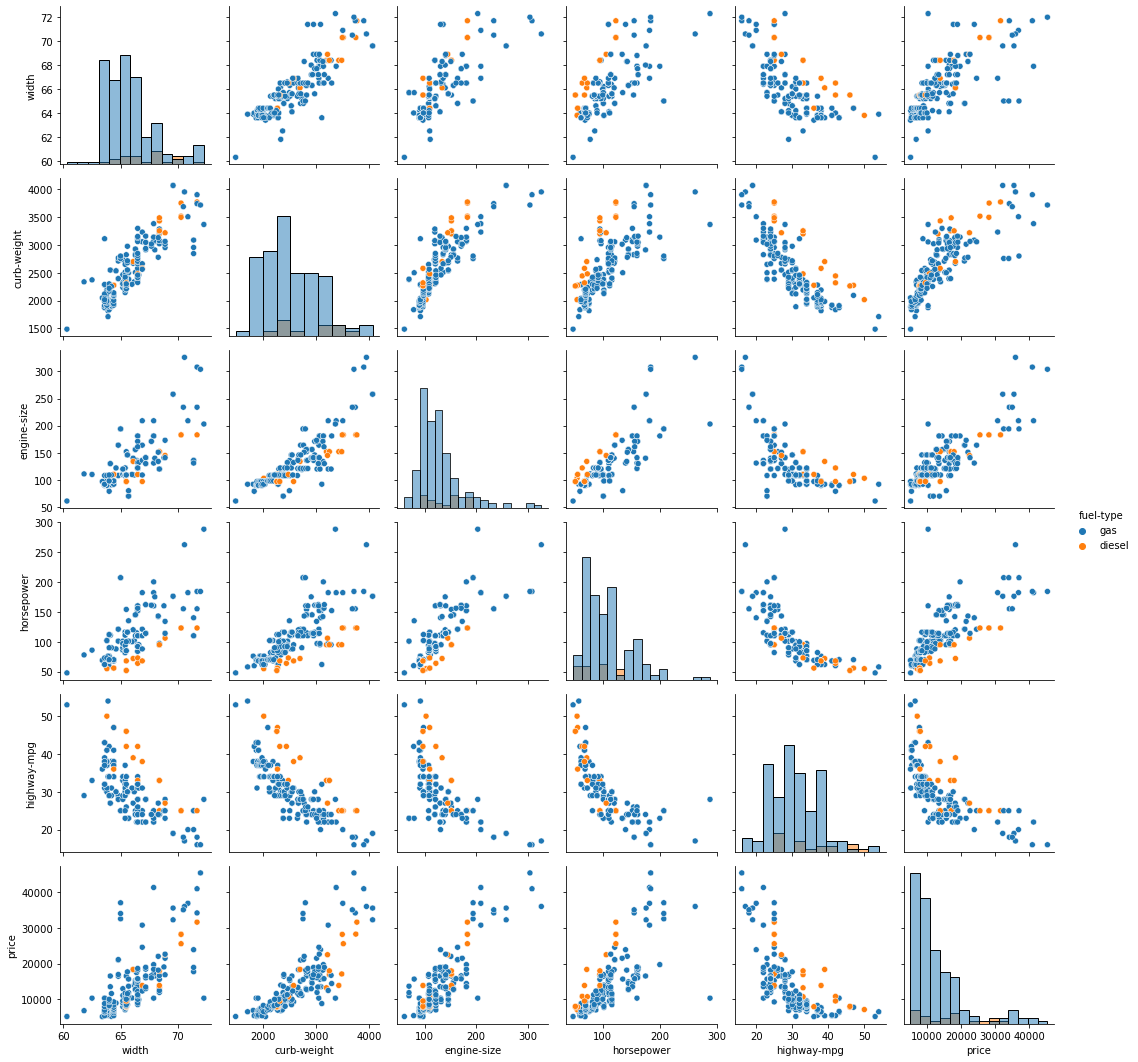

In [45]:
pair_cols = ["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price"]

plt.figure()
sns.pairplot(df[pair_cols], hue="fuel-type", palette='tab10', diag_kind="hist")
plt.show()

<a id='conclusions'></a>

## Conclusions

### 1- The data have high values in price, where The type of cars were (mercedes-benz, bmw, jaguar, porsche) 

In [46]:
df['price'].describe()

count      205.000000
mean     13150.307317
std       7879.121326
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

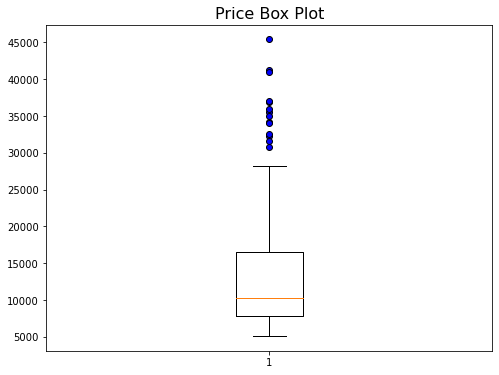

In [47]:
plt.figure(figsize=(8,6))
plt.boxplot(df['price'], flierprops=dict(markerfacecolor='b', marker='o'), showfliers=True, vert=True)
plt.title('Price Box Plot', size=16)
plt.show()

In [48]:
df[df['price'] > 28000].sort_values('price')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_log
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0,10.246226
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0,10.248778
15,0,115.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0,10.333970
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0,10.360912
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0,10.381273
126,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0,10.389857
127,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0,10.434939
71,-1,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0,10.439513
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0,10.464702
48,0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,35550.0,10.478695


### 2- The data have high values in compression-ratio, where fuel-type is "diesel" and fuel-system is "idi"

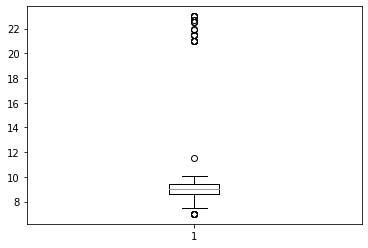

In [49]:
plt.figure()
plt.boxplot(df['compression-ratio'], vert=True, showfliers=True)
plt.show()

In [50]:
df[df['compression-ratio'] > 12]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_log
63,0,115.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0,9.286838
66,0,115.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0,9.817058
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0,10.148471
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0,10.248778
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0,10.246226
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0,10.360912
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0,8.867709
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0,9.487972
110,0,115.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0,9.536762
112,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0,9.735069


In [51]:
df[ (df['fuel-type'] == "diesel") & (df['fuel-system'] == "idi") ].sort_values('compression-ratio')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_log
112,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0,9.735069
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0,9.487972
110,0,115.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0,9.536762
114,0,115.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,idi,3.70,3.52,21.0,95.0,4150.0,25,25,17075.0,9.745371
116,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95.0,4150.0,28,33,17950.0,9.795345
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0,10.148471
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0,10.248778
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0,10.246226
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0,10.360912
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0,8.867709


### 3- width feature has high positive correlation with curb-weight feature

### 4- highway-mpg feature has high negative correlation with most features in the data 

In [52]:
# pair_cols = ["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price"]

# plt.figure()
# sns.pairplot(df[pair_cols], hue="fuel-type", palette='tab10', diag_kind="hist")
# plt.show()

## prediction 

### 1- Features Reduction

In [53]:
df_reduc = df.drop(columns = ['width','length','wheel-base','engine-size','highway-mpg','horsepower','city-mpg'])

In [54]:
df_reduc.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,height,curb-weight,engine-type,num-of-cylinders,fuel-system,bore,stroke,compression-ratio,peak-rpm,price,price_log
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,5000.0,13495.0,9.510075
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,3.47,2.68,9.0,5000.0,16500.0,9.711116
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,52.4,2823,ohcv,six,mpfi,2.68,3.47,9.0,5000.0,16500.0,9.711116
3,2,164.0,audi,gas,std,four,sedan,fwd,front,54.3,2337,ohc,four,mpfi,3.19,3.40,10.0,5500.0,13950.0,9.543235
4,2,164.0,audi,gas,std,four,sedan,4wd,front,54.3,2824,ohc,five,mpfi,3.19,3.40,8.0,5500.0,17450.0,9.767095


Text(0.5, 1.0, 'CORRELATION MATRIX')

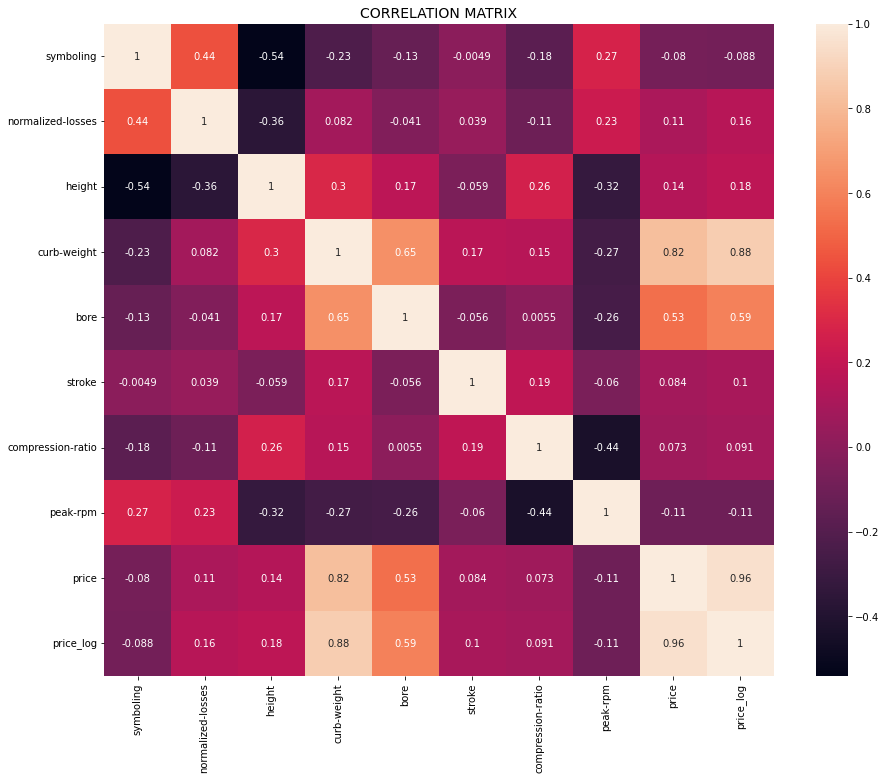

In [55]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(df_reduc.corr(), annot=True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

### 2- Categorical Features Transformation

In [56]:
df2 = pd.get_dummies(df_reduc)
df2

,symboling,normalized-losses,height,curb-weight,bore,stroke,compression-ratio,peak-rpm,price,price_log,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,48.8,2548,3.47,2.68,9.0,5000.0,13495.0,9.510075,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,48.8,2548,3.47,2.68,9.0,5000.0,16500.0,9.711116,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,52.4,2823,2.68,3.47,9.0,5000.0,16500.0,9.711116,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,54.3,2337,3.19,3.40,10.0,5500.0,13950.0,9.543235,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,54.3,2824,3.19,3.40,8.0,5500.0,17450.0,9.767095,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,55.5,2952,3.78,3.15,9.5,5400.0,16845.0,9.731809,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,55.5,3049,3.78,3.15,8.7,5300.0,19045.0,9.854560,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,55.5,3012,3.58,2.87,8.8,5500.0,21485.0,9.975110,...,0,0,0,0,0,0,0,1,0,0
203,-1,95.0,55.5,3217,3.01,3.40,23.0,4800.0,22470.0,10.019936,...,0,0,0,0,0,1,0,0,0,0


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    float64
 2   height                   205 non-null    float64
 3   curb-weight              205 non-null    int64  
 4   bore                     205 non-null    float64
 5   stroke                   205 non-null    float64
 6   compression-ratio        205 non-null    float64
 7   peak-rpm                 205 non-null    float64
 8   price                    205 non-null    float64
 9   price_log                205 non-null    float64
 10  make_alfa-romero         205 non-null    uint8  
 11  make_audi                205 non-null    uint8  
 12  make_bmw                 205 non-null    uint8  
 13  make_chevrolet           205 non-null    uint8  
 14  make_dodge               2

In [58]:
#Normalization: (X-X.min())/(X.max()-X.min())
#Standardization: (X-X.mean())/X.std()

In [59]:
scaler = MinMaxScaler()

In [60]:
scaler = scaler.fit(df2)
df3 = pd.DataFrame(scaler.transform(df2), columns=df2.columns)
df3

,symboling,normalized-losses,height,curb-weight,bore,stroke,compression-ratio,peak-rpm,price,price_log,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.301205,0.083333,0.411171,0.664286,0.290476,0.12500,0.346939,0.207959,0.444190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.301205,0.083333,0.411171,0.664286,0.290476,0.12500,0.346939,0.282558,0.536295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.301205,0.383333,0.517843,0.100000,0.666667,0.12500,0.346939,0.282558,0.536295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.596386,0.541667,0.329325,0.464286,0.633333,0.18750,0.551020,0.219254,0.459382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.596386,0.541667,0.518231,0.464286,0.633333,0.06250,0.551020,0.306142,0.561941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.180723,0.641667,0.567882,0.885714,0.514286,0.15625,0.510204,0.291123,0.545775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.2,0.180723,0.641667,0.605508,0.885714,0.514286,0.10625,0.469388,0.345738,0.602012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.2,0.180723,0.641667,0.591156,0.742857,0.380952,0.11250,0.551020,0.406311,0.657241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.2,0.180723,0.641667,0.670675,0.335714,0.633333,1.00000,0.265306,0.430763,0.677777,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
X = df3.drop('price', axis=1)
y = pd.DataFrame(df3['price'])

In [62]:
X

,symboling,normalized-losses,height,curb-weight,bore,stroke,compression-ratio,peak-rpm,price_log,make_alfa-romero,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.301205,0.083333,0.411171,0.664286,0.290476,0.12500,0.346939,0.444190,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.301205,0.083333,0.411171,0.664286,0.290476,0.12500,0.346939,0.536295,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.301205,0.383333,0.517843,0.100000,0.666667,0.12500,0.346939,0.536295,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.596386,0.541667,0.329325,0.464286,0.633333,0.18750,0.551020,0.459382,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.596386,0.541667,0.518231,0.464286,0.633333,0.06250,0.551020,0.561941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.180723,0.641667,0.567882,0.885714,0.514286,0.15625,0.510204,0.545775,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.2,0.180723,0.641667,0.605508,0.885714,0.514286,0.10625,0.469388,0.602012,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.2,0.180723,0.641667,0.591156,0.742857,0.380952,0.11250,0.551020,0.657241,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.2,0.180723,0.641667,0.670675,0.335714,0.633333,1.00000,0.265306,0.677777,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
y

,price
0,0.207959
1,0.282558
2,0.282558
3,0.219254
4,0.306142
...,...
200,0.291123
201,0.345738
202,0.406311
203,0.430763


In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
print(x_train.shape)
x_train.head()

(164, 69)


,symboling,normalized-losses,height,curb-weight,bore,stroke,compression-ratio,peak-rpm,price_log,make_alfa-romero,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
66,0.4,0.301205,0.550000,0.470132,0.635714,0.747619,0.9375,0.020408,0.584831,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
111,0.4,0.578313,0.741667,0.615593,0.657143,0.057143,0.0875,0.346939,0.510010,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
153,0.4,0.072289,0.941667,0.307215,0.364286,0.457143,0.1250,0.265306,0.138066,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.6,0.343373,0.558333,0.187355,0.435714,0.580952,0.1500,0.428571,0.175011,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.4,0.246988,0.458333,0.310706,0.435714,0.719048,0.1250,0.673469,0.263412,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
print(x_test.shape)
x_test.head()

(41, 69)


,symboling,normalized-losses,height,curb-weight,bore,stroke,compression-ratio,peak-rpm,price_log,make_alfa-romero,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
15,0.4,0.301205,0.658333,0.675718,0.771429,0.628571,0.062500,0.510204,0.821648,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.4,0.301205,0.350000,0.607060,0.421429,0.633333,0.000000,0.551020,0.320190,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100,0.4,0.246988,0.575000,0.315749,0.564286,0.666667,0.093750,0.428571,0.285728,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
132,1.0,0.512048,0.691667,0.453840,0.714286,0.476190,0.144375,0.448980,0.384636,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
68,0.2,0.168675,0.908333,0.877424,0.742857,0.747619,0.906250,0.081633,0.782618,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
print(y_train.shape)
y_train.head()

(164, 1)


,price
66,0.328335
111,0.259719
153,0.044685
96,0.059108
38,0.098729


In [68]:
print(y_test.shape)
y_test.head()

(41, 1)


,price
15,0.636562
9,0.128519
100,0.110000
132,0.167122
68,0.574202


In [69]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(x_test)

In [89]:
# y_pred = pd.DataFrame(y_pred, columns='price')     # Why -->  not correct
y_pred

array([[ 6.02149963e-01],
       [ 2.02964783e-01],
       [ 1.48807526e-01],
       [ 1.82472229e-01],
       [ 6.01348877e-01],
       [ 9.03358459e-02],
       [ 5.10101318e-02],
       [ 1.20304108e-01],
       [ 1.18751526e-01],
       [ 4.60052490e-02],
       [ 2.30796814e-01],
       [ 8.25843811e-02],
       [ 3.13331604e-01],
       [ 1.08192444e-01],
       [ 8.21449280e-01],
       [ 3.41835022e-02],
       [ 2.90525896e+11],
       [ 1.95976257e-01],
       [ 9.57069397e-02],
       [ 1.24488831e-01],
       [ 8.84437561e-02],
       [ 2.27699280e-01],
       [ 1.18045807e-01],
       [-2.99949646e-02],
       [ 2.05726624e-02],
       [ 6.92054749e-01],
       [ 1.37611389e-01],
       [ 2.19642639e-01],
       [ 7.51991272e-02],
       [ 2.12318420e-01],
       [ 5.87921143e-01],
       [ 5.61904907e-03],
       [ 5.92689514e-02],
       [ 3.91212463e-01],
       [ 4.61349487e-02],
       [ 6.60064697e-01],
       [ 1.65870667e-01],
       [ 1.46850586e-01],
       [ 1.4

In [72]:
y_test

,price
15,0.636562
9,0.128519
100,0.110000
132,0.167122
68,0.574202
95,0.066556
159,0.066283
162,0.102775
147,0.126111
182,0.065960


In [73]:
rmse = np.sqrt( mean_squared_error(y_pred, y_test) )
rmse

45372522031.96425

### 3- Divide Data into Train & Test

In [74]:
# x = df2.drop('price', axis=1)
# y = pd.DataFrame(df2['price'])

In [75]:
# x.head()

In [76]:
# y.head()

### 4- Numerical Features Scaling

In [77]:
# X = scaler_x.transform(X)
# y = scaler_y.transform(y)

In [78]:
# feature_corr[(feature_corr>0.7)&(feature_corr<1)]

In [79]:
#Show Highly Correlated Features > 0.7
#print(feature_corr[(abs(feature_corr)>0.7) & (abs(feature_corr)<1)].drop_duplicates())

In [80]:
# high_corr_df = pd.DataFrame(feature_corr[(abs(feature_corr)>0.7) & (abs(feature_corr)<1)].drop_duplicates())
# high_corr_df.index

In [81]:
# car_reduc['normalized-losses_log'] = np.log(car_reduc['normalized-losses']+1)

In [82]:
# df["make"].value_counts()

In [83]:
# df["make"].unique()

In [84]:
# df["make"].nunique()

In [85]:
# plt.figure(figsize=(16,8))
# sns.boxplot(x=df['make'], y=df['price'])
# plt.title('Price/Make Box Plot', size=16)
# plt.xlabel('Make', size=18)
# plt.ylabel('Price', size=18)
# plt.xticks(rotation='vertical', size=14)
# plt.yticks(rotation='horizontal', size=14)
# plt.show()

In [86]:
# plt.figure(figsize=(20,8))
# plt.bar(x=x_data, height=y_data, color='g', edgecolor='k', linewidth=1, width=0.6)
# plt.title('Car Make Distribution', size=28)
# plt.xlabel('Car Make', size=18)
# plt.ylabel('Number of Cars', size=18)
# plt.xticks(rotation='vertical', size=14)
# plt.yticks(rotation='horizontal', size=14)

# plt.show()